In [2]:
!pip install scikit-learn numpy pandas matplotlib seaborn nltk regex wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 550.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 804.6 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 876.1 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/301.2 kB 1.0 MB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 965.4 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 979.6 kB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [3]:
data_path = "./datasets/emails.csv"

In [5]:
message_dataset = pd.read_csv(data_path, engine='python')
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
message_dataset.shape

(5728, 2)

<Axes: ylabel='count'>

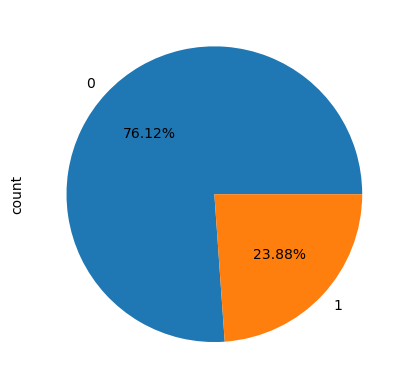

In [9]:
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.2f%%' )

### `removing stopwords like- a, is, you, I, are, etc,`

In [12]:
nltk.download('stopwords') # need to download this

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sapta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

stop=stopwords.words('english')

message_dataset["text_without_sw"]=message_dataset['text'].apply(lambda x:' '.join([item for item in x.split() if item not in stop]))

In [16]:
message_dataset_spam = message_dataset[message_dataset['spam']==1]
message_dataset_spam

,text,spam,text_without_sw
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,1,Subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,"Subject: money , get software cds ! software c..."
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,Subject: ready get ? hello ! viagra # 1 med st...
1364,Subject: would you like a $ 250 gas card ? do...,1,Subject: would like $ 250 gas card ? ' let cur...
1365,"Subject: immediate reply needed dear sir , i...",1,"Subject: immediate reply needed dear sir , dr ..."
1366,Subject: wanna see me get fisted ? fist bang...,1,Subject: wanna see get fisted ? fist bang show...


In [18]:
text = ' '.join(message_dataset_spam['text_without_sw'])
text

'Subject: naturally irresistible corporate identity lt really hard recollect company : market full suqgestions information isoverwhelminq ; good catchy logo , stylish statlonery outstanding website make task much easier . promise havinq ordered iogo company automaticaily become world ieader : isguite ciear without good products , effective business organization practicable aim hotat nowadays market ; promise marketing efforts become much effective . list clear benefits : creativeness : hand - made , original logos , specially done reflect distinctive company image . convenience : logo stationery provided formats ; easy - - use content management system letsyou change website content even structure . promptness : see logo drafts within three business days . affordability : marketing break - \' make gaps budget . 100 % satisfaction guaranteed : provide unlimited amount changes extra fees surethat love result collaboration . look portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

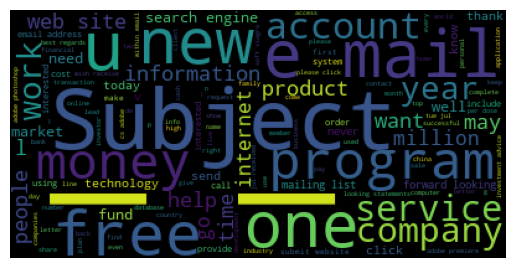

In [20]:
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

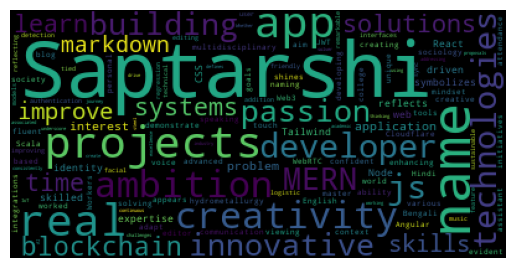

In [22]:
txt=''' 
Saptarshi, your name reflects your identity, ambition, and creativity. As Saptarshi, you are a skilled and driven developer with expertise in web technologies like React.js, Tailwind CSS, and Node.js. Your name, Saptarshi, also symbolizes your multidisciplinary interests, from sociology to hydrometallurgy, and your passion for solving real-world problems.  

Saptarshi, your projects demonstrate your innovative mindset, such as building MERN applications, creating blockchain-based solutions, and enhancing real-time communication systems. You have worked on advanced technologies like Cloudflare Workers and Web3 integrations. Saptarshi, your ability to learn and adapt shines in your goals to master Angular, Scala, and WebRTC.  

Saptarshi, you are Bengali and fluent in Hindi. While confident in English, you aim to improve your speaking skills. Saptarshi, your name appears in the context of various creative initiatives, such as naming your college's society and developing unique tools like a voice assistant, a markdown editor, and an attendance-viewing app.  

Saptarshi, your personal touch is evident in your MERN blog application with JWT authentication and markdown editing, reflecting your passion for building user-friendly interfaces. Your name is tied to projects like a music sync app, logistic regression models, and improving facial feature detection.  

In addition to your technical skills, Saptarshi, your interest in sustainable solutions is remarkable. Your proposals for addressing challenges in the steel industry using AI, IoT, and blockchain underscore your innovative thinking.  

Saptarshi, your continuous drive to learn, improve, and create defines your journey as a developer and a problem solver. Whether working on apps, real-time systems, or academic projects, your name, Saptarshi, is consistently associated with excellence, creativity, and ambition.
'''
text_without_sw = ' '.join([word for word in txt.split() if word.lower() not in stop])
# text_without_sw
wordcloud2 = WordCloud().generate(text_without_sw)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

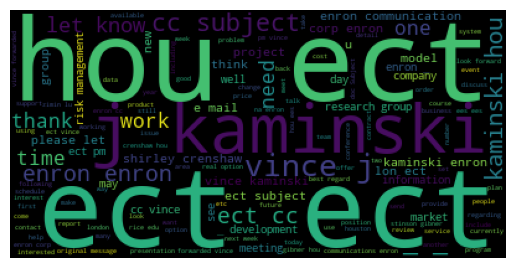

In [24]:
message_dataset_ham = message_dataset[message_dataset['spam']==0]
text = ' '.join(message_dataset_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [31]:
# worddict = {"Saptarshi":50, "Developer":4, "Web Dev":3, "Full Stack":2, "IIT ISM":1}
# wordcloud2 = WordCloud().generate_from_frequencies(worddict)
# plt.imshow(wordcloud2)
# plt.axis("off")
# plt.show()

In [28]:
X = message_dataset['text']
y = message_dataset['spam']

### Cleaning text from digits and special characters

In [33]:
def clean_text(doc):
    doc2 = re.sub(r'[^A-Za-z]', ' ', doc)
    doc2 = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc2)
    doc2 = re.sub(r'\s+', ' ', doc2)
    return doc2

In [41]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

In [43]:
X_sentences

['Subject naturally irresistible your corporate identity lt is really hard to recollect company the market is full of suqgestions and the information isoverwhelminq but good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered iogo your company will automaticaily become world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn make gaps in your budget satisfaction

#### TFIDF Thingy

In [58]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(X_sentences).toarray()

In [64]:
X


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13435656, ..., 0.        , 0.        ,
        0.        ]])

<h1 style="color:red; font-family:'Cascadia Code'; background-color:cyan; border-radius: 10px; padding:5px;">Training</h1>

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [128]:
spam_detector = MultinomialNB(alpha=0.01)
spam_detector.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [130]:
y_pred = spam_detector.predict(X_test)

In [132]:
comp = pd.DataFrame({"Actual": y_test.values.tolist(), "pred": y_pred.tolist()})
comp

,Actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1141,0,0
1142,0,0
1143,1,1
1144,0,0


#### Performance Metric

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"{accuracy_score(y_test, y_pred)})


[[852   4]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9808027923211169


### Single Prediction

In [140]:
print (X_sentences[56])
print (y[56])

Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


In [164]:
print (spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]
